In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import os
basePath = '../measurements/'
def moveFiguresToTexDir():
    for file in os.listdir('.'):
        if file.endswith(".pdf"):
            print('moving', file)
            dest = '../tex/figures/' + file
#             if os.path.exists(dest):
#                   os.remove(dest)
            os.rename(file, dest)

In [2]:

df = pd.read_csv(basePath+'1_Octree_maxDepth_10_maxInLeaf_4_w_duplicates_response_on.csv'
                 , header=None,
                names=['dt','size','count', 'maxDepth','maxLeaft','totalLeafElements'])
nrange = range(len(df))


In [3]:
# df.groupby('count').mean().index

In [4]:
def plot(dataframe, xstr, ystr, xlabel, ylabel, figname, 
         xlimUpper=None,  ylimUpper=None, title=None, dataframe2=None, label1=None, label2=None, xticksrot=0, drawLinear=True,
        xstr2=None, ystr2=None, scientific=False):
    if xstr == 'index':
        # dont group by, just plot ystr
        xdf, ydf = range(len(dataframe)), dataframe[ystr]
    else:
        dfg = dataframe.groupby(xstr).mean()
        xdf, ydf = dfg.index, dfg[ystr]
    lbl = 'uzorak' if label1 is None else label1
    if scientific:
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.plot(xdf, ydf, label=lbl) #1/df['dt']*60)
    if dataframe2 is not None:
        lbl = 'uzorak' if label2 is None else label2
        xstr2 = xstr if xstr2 is None else xstr2
        ystr2 = ystr if ystr2 is None else ystr2
        if xstr2 == 'index':
        # dont group by, just plot ystr
            plt.plot( range(len(dataframe2)), dataframe2[ystr2], label=lbl)
        else:
            plt.plot(dataframe2[xstr2], dataframe2[ystr2], label=lbl) 
    if title != None:
        plt.title(title)
    # plt.plot([-10, max(df['count'])], [1,1])
    if drawLinear:
        plt.plot([min(xdf), max(xdf)], [min(ydf), min(ydf) * max(xdf)/min(xdf) ], 'g--', label='linearno', alpha=0.5)
    plt.xlim(min(xdf), xlimUpper if xlimUpper is not None else max(xdf))
    if ylimUpper != None:
        plt.ylim(0, ylimUpper) #5
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=xticksrot)
    plt.axhline(y=1, color='orange', alpha=0.3, label='60fps')
    plt.axhline(y=2, color='red', alpha=0.3, label='30fps')
    plt.legend()
    plt.savefig(figname + '.pdf', bbox_inches='tight')
    plt.show()


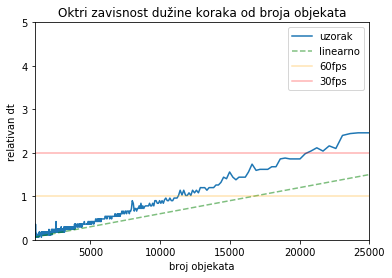

In [5]:

plot(dataframe=df, xstr='count', ystr='dt', 
     xlabel='broj objekata', ylabel='relativan dt', xlimUpper=25000, ylimUpper=5, 
     title='Oktri zavisnost dužine koraka od broja objekata', figname='oktri_dt_vs_numobj')

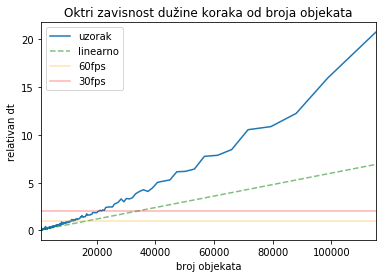

In [6]:
plot(dataframe=df, xstr='count', ystr='dt', 
     xlabel='broj objekata', ylabel='relativan dt',# xlimUpper=25000, ylimUpper=5, 
     title='Oktri zavisnost dužine koraka od broja objekata', figname='oktri_dt_vs_numobj_zoomout')

In [7]:
df1 = pd.read_csv(basePath+'Idle_drawing.csv'
                 , header=None,
                names=['dt','size','count'])
df2 = pd.read_csv(basePath+'Idle_notDrawing.csv'
                 , header=None,
                names=['dt','size','count'])

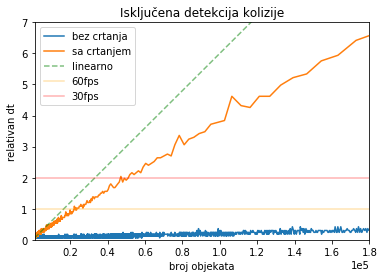

In [8]:
plot(dataframe=df2, xstr='count', ystr='dt', 
     xlabel='broj objekata', ylabel='relativan dt', xlimUpper=180000, ylimUpper=7, 
     title='Isključena detekcija kolizije', figname='idleDrawVsNoDraw',
    dataframe2=df1, label1='bez crtanja', label2='sa crtanjem', xticksrot=0, scientific=True)

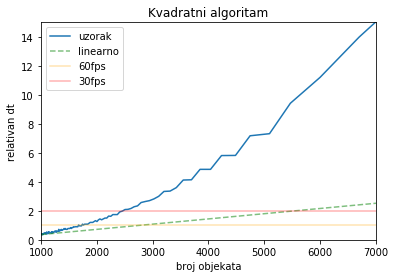

In [9]:
df = pd.read_csv(basePath+'BasicCollision.csv'
                 , header=None,
                names=['dt','size','count'])

plot(dataframe=df, xstr='count', ystr='dt', 
     xlabel='broj objekata', ylabel='relativan dt', xlimUpper=7000, ylimUpper=15, 
     title='Kvadratni algoritam', figname='basicCollision',
   )

In [27]:
moveFiguresToTexDir()

moving octree_dup_vs_nodup.pdf


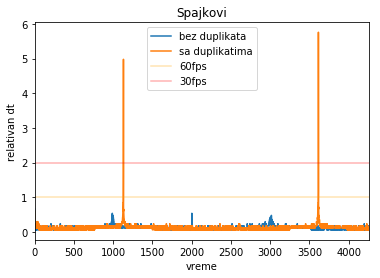

In [11]:
dfNoCollOctreeDups = pd.read_csv(basePath+'octree_duplicates_jolt.csv'
                 , header=None,
                names=['dt','size','count', 'maxDepth','maxLeaft','totalLeafElements'])

dfNoCollOctreeNoDups = pd.read_csv(basePath+'octree_nodups_jolt.csv'
                 , header=None,
                names=['dt','size','count', '_a','_b','_c', '_d'])

plot(dataframe=dfNoCollOctreeNoDups , xstr='index', ystr='dt', 
     xlabel='vreme', ylabel='relativan dt', #xlimUpper=7000, ylimUpper=15, 
     title='Spajkovi', figname='octreeSpikes', drawLinear=False,
    dataframe2=dfNoCollOctreeDups, label1='bez duplikata', label2='sa duplikatima'
   )

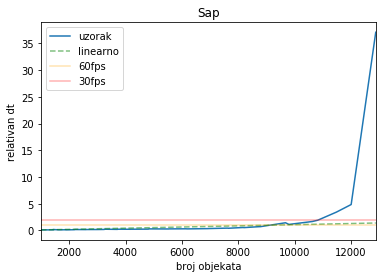

In [12]:

dfsap = pd.read_csv(basePath+'sap1.csv'
                 , header=None,
                names=['dt','size','count', 'swaps'])
dfsap = dfsap[(dfsap.swaps != 0)]
plot(dataframe=dfsap
, xstr='count', ystr='dt', 
     xlabel='broj objekata', ylabel='relativan dt', # xlimUpper=7000, ylimUpper=15, 
     title='Sap', figname='sap1',
   )

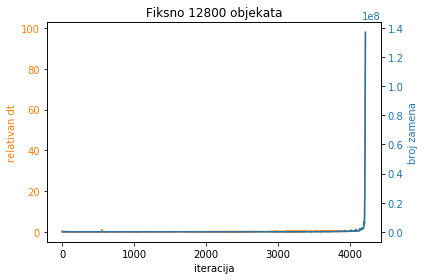

In [13]:
fig, ax1 = plt.subplots()

color = '#ff7f0e'
ax1.set_xlabel('iteracija')
ax1.set_ylabel('relativan dt', color=color)
ax1.plot(range(len(dfsap)), dfsap.dt, color=color, label='dt')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = '#1f77b4'
ax2.set_ylabel('broj zamena', color=color)  # we already handled the x-label with ax1
ax2.plot(range(len(dfsap)), dfsap.swaps, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Fiksno 12800 objekata")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("dtSapCrawl" + '.pdf', bbox_inches='tight')
plt.show()


In [14]:
dfsapdiv2 = pd.read_csv(basePath+'sap_div2.csv'
                 , header=None,
                names=['dt','size','count', 'swaps'])

dfsapdiv2 = dfsapdiv2[(dfsapdiv2.swaps != 0)]

dfsapdiv4 = pd.read_csv(basePath+'sap_div4.csv'
                 , header=None,
                names=['dt','size','count', 'swaps'])

dfsapdiv4 = dfsapdiv4[(dfsapdiv4.swaps != 0)]


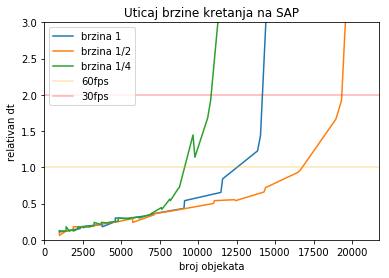

In [15]:
s1g = dfsap.groupby('count').mean()
s2g = dfsapdiv2.groupby('count').mean()
s4g = dfsapdiv4.groupby('count').mean()

plt.plot(s2g.index, s2g.dt, label='brzina 1')
plt.plot(s4g.index, s4g.dt, label='brzina 1/2')
plt.plot(s1g.index, s1g.dt, label='brzina 1/4')

plt.axhline(y=1, color='orange', alpha=0.3, label='60fps')
plt.axhline(y=2, color='red', alpha=0.3, label='30fps')

plt.title('Uticaj brzine kretanja na SAP')
plt.ylim(0,3)
plt.xlabel('broj objekata')
plt.ylabel('relativan dt')
plt.legend()
plt.savefig("sap3speeds" + '.pdf', bbox_inches='tight')
plt.show()

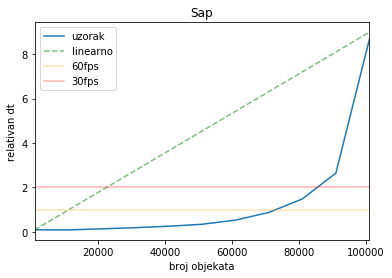

In [16]:
dfsapdiv64 = pd.read_csv(basePath+'sap_div64.csv'
                 , header=None,
                names=['dt','size','count', 'swaps'])

dfsapdiv64 = dfsapdiv64[(dfsapdiv64.swaps != 0)]
plot(dataframe=dfsapdiv64
, xstr='count', ystr='dt', 
     xlabel='broj objekata', ylabel='relativan dt', # xlimUpper=7000, ylimUpper=15, 
     title='Sap', figname='sap_great',
   )

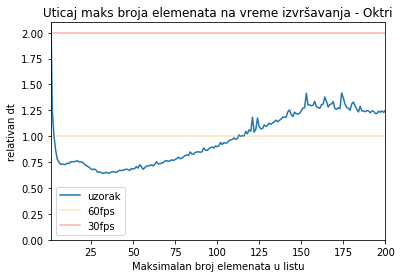

In [17]:
dfleaf = pd.read_csv(basePath+'octree_maxLeafDiff.csv'
                 , header=None,
                names=['dt','size','count', 'maxDepth','maxLeaf','totalLeafElements'])

plot(dataframe=dfleaf
, xstr='maxLeaf', ystr='dt', 
     xlabel='Maksimalan broj elemenata u listu', ylabel='relativan dt', ylimUpper=2.1, 
     title='Uticaj maks broja elemenata na vreme izvršavanja - Oktri', figname='octree_leaf',
     drawLinear=False
   )

In [18]:
print(dfleaf.where(dfleaf.dt <= 0.54).dropna())
print(dfleaf.where(dfleaf['maxLeaf'] == 4).dropna().mean())


        dt  size    count  maxDepth  maxLeaf  totalLeafElements
4380  0.54  0.02  10095.0      10.0     32.0            11442.0
dt                       0.867440
size                     0.020000
count                10095.000000
maxDepth                10.000000
maxLeaf                  4.000000
totalLeafElements    14276.600683
dtype: float64


In [19]:
dfleaf.where(dfleaf['maxLeaf'] == 4).dropna().mean()

dt                       0.867440
size                     0.020000
count                10095.000000
maxDepth                10.000000
maxLeaf                  4.000000
totalLeafElements    14276.600683
dtype: float64

In [20]:
dfleaf.groupby('maxLeaf').mean().min()

dt                       0.642414
size                     0.020000
count                10095.000000
maxDepth                10.000000
totalLeafElements    10610.444444
dtype: float64

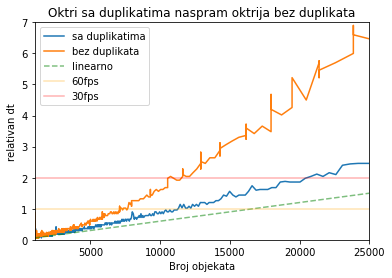

In [25]:
dfdup = pd.read_csv(basePath+'1_Octree_maxDepth_10_maxInLeaf_4_w_duplicates_response_on.csv'
                 , header=None,
                names=['dt','size','count', 'maxDepth','maxLeaft','totalLeafElements'])

dfnodup= pd.read_csv(basePath+'Octree_nodups.csv'
                 , header=None,
                names=['dt','size','count', 'maxDepth','maxLeaf','totalLeafElements', 'innerElements'])

plot(dataframe=dfdup, xlimUpper=25000, ylimUpper=7
, xstr='count', ystr='dt', 
     xlabel='Broj objekata', ylabel='relativan dt',
     title='Oktri sa duplikatima naspram oktrija bez duplikata', figname='octree_dup_vs_nodup',
     drawLinear=True,
     dataframe2=dfnodup, label1='sa duplikatima', label2='bez duplikata',
   )